In [ ]:
!pip3 install torch==1.10.1+cu113 torchvision==0.11.2+cu113 torchaudio==0.10.1+cu113 -f https://download.pytorch.org/whl/cu113/torch_stable.html


In [ ]:
%cd /content/
!git clone https://github.com/hukaixuan19970627/yolov5_obb.git

/content
Cloning into 'yolov5_obb'...


In [ ]:
%cd /content/yolov5_obb/
!pip install -r requirements.txt

In [ ]:
%cd utils/nms_rotated
!python setup.py develop 

Installed /content/yolov5_obb/utils/nms_rotated
Processing dependencies for nms-rotated==0.0.0
Finished processing dependencies for nms-rotated==0.0.0


In [ ]:
%cd /content
!mkdir /content/datasets/

/content
mkdir: cannot create directory ‘/content/datasets/’: File exists


In [ ]:
%cd /content/datasets/
!pip install roboflow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!apt install unzip
!unzip "/content/drive/MyDrive/roboflow.zip" -d "/content/datasets"

Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-21ubuntu1.2).


In [ ]:
%cd /content/yolov5_obb/
#!python train.py --data /content/datasets/roboflow/data.yaml  --weights  /content/best22.pt  --cfg yolov5s.yaml --epochs 500 --batch-size -1 --img 640   --device 0 --exist-ok --adam --image-weights --patience 4000
!python train.py --data /content/datasets/roboflow/data.yaml  --weights  ''  --cfg yolov5s.yaml --epochs 20 --batch-size -1 --img 640   --device 0 --exist-ok --adam --image-weights --patience 4000

/content/yolov5_obb
train: weights=, cfg=yolov5s.yaml, data=/content/datasets/roboflow/data.yaml, hyp=data/hyps/obb/hyp.finetune_dota.yaml, epochs=20, batch_size=-1, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=True, device=0, multi_scale=False, single_cls=False, adam=True, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=True, quad=False, linear_lr=False, label_smoothing=0.0, patience=4000, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/hukaixuan19970627/yolov5_obb ✅
YOLOv5 🚀 b00c3f2 torch 1.10.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.2, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, theta=0.5, theta_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0

In [ ]:
%cd /content/yolov5_obb/
!python val.py  --data /content/datasets/roboflow/data.yaml  --weights '/content/best24.pt' --img 640 --device 0 --save-json

/content/yolov5_obb
val: data=/content/datasets/roboflow/data.yaml, weights=['/content/best24.pt'], batch_size=8, imgsz=640, conf_thres=0.01, iou_thres=0.4, task=val, device=0, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=True, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 b00c3f2 torch 1.10.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model Summary: 213 layers, 7519858 parameters, 0 gradients, 17.4 GFLOPs
val: Scanning '../datasets/roboflow/valid/labelTxt.cache' images and labels... 302 found, 0 missing, 99 empty, 0 corrupted: 100% 302/302 [00:00<?, ?it/s]
               Class     Images     Labels          P          R  HBBmAP@.5  HBBmAP@.5:.95: 100% 38/38 [00:07<00:00,  5.43it/s]
                 all        302       7776      0.858      0.818      0.858      0.771
           PV_module        302       7339      0.982      0.965      0.985      0.898
                  D

In [ ]:
%cd /content/yolov5_obb/
#!python detect.py --weights '/content/best24.pt'  --classes 0 1 2 --source '../datasets/roboflow/test/images'   --conf-thres 0.71 --img 512 --device 0 --agnostic --hide-labels
!python detect.py --weights '/content/best24.pt' --source '../datasets/roboflow/valid/images'   --conf-thres 0.71 --img 512 --device 0 --agnostic 

/content/yolov5_obb
detect: weights=['/content/best24.pt'], source=../datasets/roboflow/valid/images, imgsz=[512, 512], conf_thres=0.71, iou_thres=0.2, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=True, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=2, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 b00c3f2 torch 1.10.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model Summary: 213 layers, 7519858 parameters, 0 gradients, 17.4 GFLOPs
Speed: 0.4ms pre-process, 12.4ms inference, 2.1ms NMS per image at shape (1, 3, 512, 512)
Results saved to runs/detect/exp2


/content/yolov5_obb/runs/detect/exp


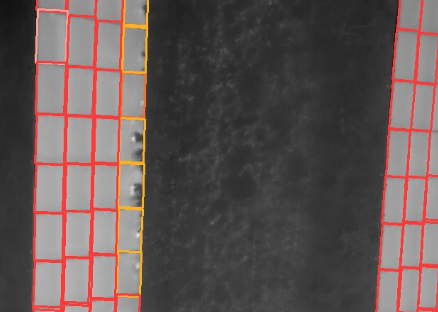

In [ ]:
%cd /content/yolov5_obb/runs/detect/exp/
import os, random
random_file = random.choice(os.listdir("/content/yolov5_obb/runs/detect/exp2"))

from IPython.display import Image
Image(random_file)